# Customer Analytics with Python

### Daniela Arenas Vanegas.

Pyladies Meetup - Noviembre 27


## Agenda

1. ¿Qué es Customer Analytics?
2. Conociendo al cliente 
3. Segmentaciones

## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

# ¿Qué es Customer Analytics?

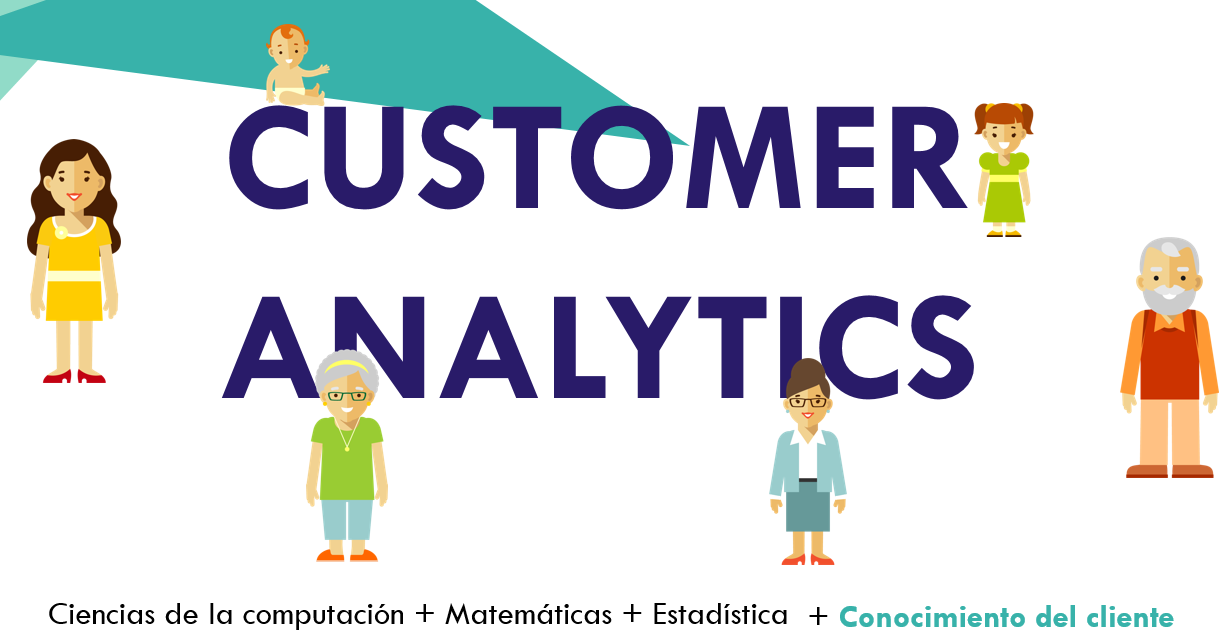

In [2]:
Image("Can.PNG")



"The goal of customer analytics is to create a single, accurate view of a customer to make decisions about how best to acquire and retain customers, identify high-value customers and proactively interact with them. The better the understanding of a customer's buying habits and lifestyle preferences, the more accurate predictive behaviors become and the better the customer journey becomes."

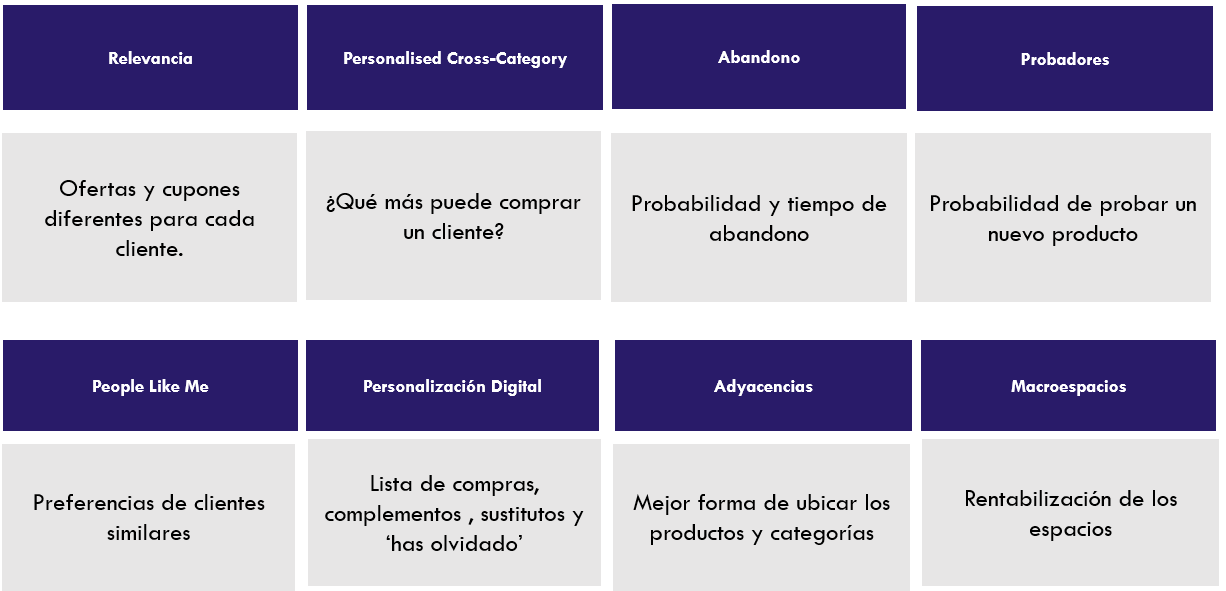

In [3]:
Image("alg.PNG")

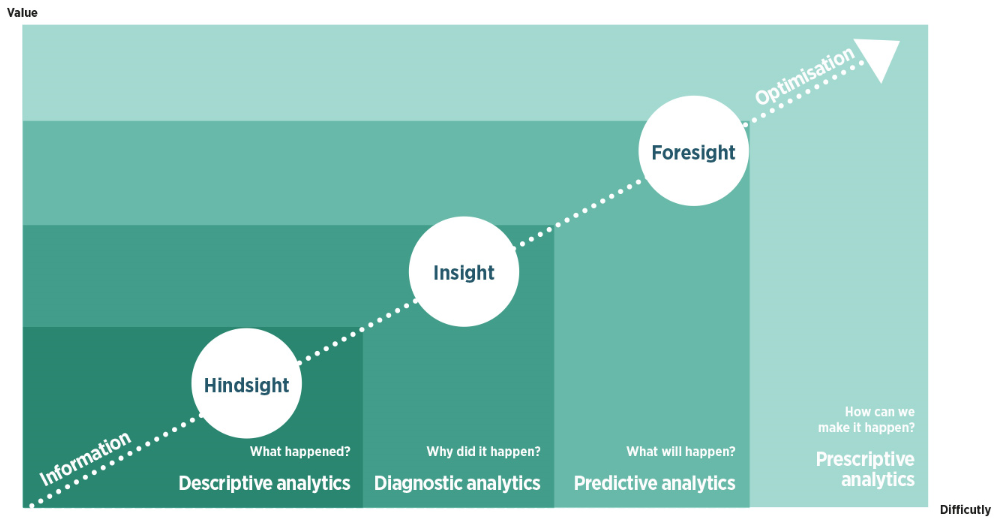

In [4]:
Image("axis.png")

#### ¿Realmente entegamos más valor si usamos técnicas más complejas?

# Conociendo al cliente

#### Cargar los datos

In [5]:
df = pd.read_csv('sales_data_sample.csv',encoding='unicode_escape')

#### Entendiendo el Dataframe (1/2)

In [6]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [7]:
df.head(3)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34.0,81.35,5.0,2765.90,5/7/2003 0:00,Shipped,2.0,5.0,2003.0,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41.0,94.74,2.0,3884.34,7/1/2003 0:00,Shipped,3.0,7.0,2003.0,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium


#### Entendiendo el Dataframe (2/2)

In [8]:
df.describe().round(decimals=2)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,1508.00,1508.00,1508.00,1508.00,1508.00,1508.00,1508.0,1508.00
mean,35.14,83.95,6.43,3568.92,2.78,7.31,2003.8,101.10
std,9.73,20.12,4.23,1847.74,1.18,3.50,0.7,40.02
min,6.00,27.22,1.00,541.14,1.00,1.00,2003.0,33.00
25%,27.00,69.87,3.00,2216.58,2.00,4.00,2003.0,68.00
50%,35.00,96.70,6.00,3194.40,3.00,8.00,2004.0,99.00
75%,43.00,100.00,9.00,4508.27,4.00,11.00,2004.0,124.00
max,85.00,100.00,18.00,14082.80,4.00,12.00,2005.0,214.00


In [9]:
df['ORDERDATE']= pd.to_datetime(df['ORDERDATE'])

In [10]:
print("Min_date: ", df['ORDERDATE'].min(), "Max_date: ", df['ORDERDATE'].max())

Min_date:  2003-01-06 00:00:00 Max_date:  2005-05-30 00:00:00


#### Ejericicio 1: Conociendo al cliente 

#### ¿Quienes son mis clientes?

In [11]:
df['CUSTOMERNAME'].unique()

array(['Land of Toys Inc.', 'Reims Collectables', 'Lyon Souveniers',
       'Toys4GrownUps.com', 'Corporate Gift Ideas Co.',
       'Technics Stores Inc.', nan, 'Mini Wheels Co.', 'Vitachrome Inc.',
       'Tekni Collectables Inc.', 'Gift Depot Inc.',
       "Marta's Replicas Co.", 'Baane Mini Imports',
       'Diecast Classics Inc.', 'Salzburg Collectables',
       'FunGiftIdeas.com', 'Classic Legends Inc.',
       'Canadian Gift Exchange Network', 'West Coast Collectables Co.',
       'Cambridge Collectables Co.', 'Super Scale Inc.',
       'Amica Models & Co.', 'Scandinavian Gift Ideas',
       'Mini Gifts Distributors Ltd.', 'Online Diecast Creations Co.',
       'Collectables For Less Inc.', 'Quebec Home Shopping Network',
       'Motor Mint Distributors Inc.', 'Mini Classics',
       'Danish Wholesale Imports', 'Mini Creations Ltd.', 'Alpha Cognac',
       'Collectable Mini Designs Co.', 'Petit Auto', 'Gifts4AllAges.com',
       'giftsbymail.co.uk', 'The Sharp Gifts Warehouse',
 

Pueden surgir preguntas similares como: ¿De dónde son mis clientes?, ¿En qué mes compraron?, ¿Cuáles son los status de las ordenes? etc. 

In [12]:
list(df['CITY'].unique())

['NYC',
 'Reims',
 'Paris',
 'Pasadena',
 'San Francisco',
 'Burlingame',
 nan,
 'Newark',
 'Bridgewater',
 'Cambridge',
 'Stavern',
 'Allentown',
 'Salzburg',
 'New Bedford',
 'Vancouver',
 'Burbank',
 'New Haven',
 'Torino',
 'Boras',
 'San Rafael',
 'Nashua',
 'Brickhaven',
 'Montreal',
 'Philadelphia',
 'White Plains',
 'Kobenhavn',
 'Toulouse',
 'San Diego',
 'Bruxelles',
 'Boston',
 'Cowes',
 'San Jose',
 'Graz',
 'Singapore',
 'Makati City',
 'Reggio Emilia',
 'Aaarhus',
 'Glendale',
 'Brisbane',
 'Las Vegas',
 'Bergamo']

#### ¿Qué compran mis clientes?

In [13]:
list(df['PRODUCTLINE'].unique())

['Motorcycles',
 nan,
 'Classic Cars',
 'Trucks and Buses',
 'Vintage Cars',
 'Planes',
 'Ships',
 'Trains']

#### ¿Qué compra cada cliente?

In [14]:
(df.groupby(['CUSTOMERNAME','PRODUCTLINE'])['SALES'].sum()).head(12)


CUSTOMERNAME             PRODUCTLINE     
Alpha Cognac             Classic Cars        20743.56
                         Planes              19072.64
                         Ships               21782.88
                         Vintage Cars         8889.36
Amica Models & Co.       Classic Cars        28921.62
                         Ships                6948.62
                         Trains               2418.24
                         Trucks and Buses     2800.08
                         Vintage Cars        53028.70
Auto-Moto Classics Inc.  Planes               9175.86
                         Ships                6206.27
                         Vintage Cars        11097.13
Name: SALES, dtype: float64

El proximo mes tendré un 30% de descuento en Trenes, ¿A quién debo enviarle un email para comunicarle la promoción?

Si conozco mi cliente, le entrego sólo lo que le interesa. 
- Personalización!!
- Mayor retorno!

In [15]:
df.loc[df['PRODUCTLINE'] == 'Trains', ['CUSTOMERNAME','SALES']].head()

,CUSTOMERNAME,SALES
1065,Danish Wholesale Imports,4330.10
1068,Mini Gifts Distributors Ltd.,2151.82
1072,Mini Creations Ltd.,3952.83
1073,Super Scale Inc.,3564.75
1075,Petit Auto,1855.41


#### ¿Cuál es mi producto más vendedor?

In [16]:
df.groupby(['PRODUCTLINE'])['SALES'].sum().sort_values(ascending=False)

PRODUCTLINE
Classic Cars        2000666.72
Vintage Cars        1064030.66
Motorcycles          661108.13
Trucks and Buses     598250.38
Planes               544154.01
Ships                388602.13
Trains               125121.13
Name: SALES, dtype: float64

#### ¿Cuál es el cliente que más compra?

In [17]:
df.groupby(['CUSTOMERNAME'])['SALES'].sum().sort_values(ascending=False).head(10)

CUSTOMERNAME
Mini Gifts Distributors Ltd.    654858.06
Muscle Machine Inc              197736.94
Land of Toys Inc.               164069.44
The Sharp Gifts Warehouse       160010.27
Corporate Gift Ideas Co.        149882.50
Salzburg Collectables           149798.63
Danish Wholesale Imports        145041.60
L'ordine Souveniers             142601.33
Rovelli Gifts                   137955.72
Reims Collectables              135042.94
Name: SALES, dtype: float64

Que un cliente sea el más compra, no significa que sea mi mejor cliente. Tenemos más variables que estudiar!!

#### ¿Cuantas unidades llevan mis clientes en cada orden?

In [18]:
(df.groupby(['CUSTOMERNAME','ORDERNUMBER'])['QUANTITYORDERED'].sum()).head(15)

CUSTOMERNAME                ORDERNUMBER
Alpha Cognac                10136          102.0
                            10178          413.0
                            10397          172.0
Amica Models & Co.          10280          551.0
                            10293          292.0
Auto-Moto Classics Inc.     10130           73.0
                            10290           71.0
                            10352          143.0
Baane Mini Imports          10103          541.0
                            10158           22.0
                            10309          190.0
                            10325          329.0
Boards & Toys Co.           10154           67.0
                            10376           35.0
Cambridge Collectables Co.  10228          194.0
Name: QUANTITYORDERED, dtype: float64

#### ¿Cuantas unidades llevan mis clientes en promedio? (1/4)

1 - Calculamos las unidades totales que lleva cada cliente

In [19]:
unidades = df.groupby(['CUSTOMERNAME'])['QUANTITYORDERED'].sum()
unidades.head()

CUSTOMERNAME
Alpha Cognac                687.0
Amica Models & Co.          843.0
Auto-Moto Classics Inc.     287.0
Baane Mini Imports         1082.0
Boards & Toys Co.           102.0
Name: QUANTITYORDERED, dtype: float64

#### ¿Cuantas unidades llevan mis clientes en promedio? (2/4)

2 - Calculamos el número de ordenes que ha hecho cada cliente

In [20]:
ordenes = df.groupby(['CUSTOMERNAME'])['ORDERNUMBER'].count().sort_values(ascending = False)
ordenes.head(3)

CUSTOMERNAME
Mini Gifts Distributors Ltd.    180
Land of Toys Inc.                49
Muscle Machine Inc               48
Name: ORDERNUMBER, dtype: int64

¿Estamos seguros que este es el valor correcto?

In [21]:
print({ 'Número de registros' : len(df), 
        'Número de registros únicos' : df['ORDERNUMBER'].nunique()})

{'Número de registros': 2823, 'Número de registros únicos': 1480}


In [22]:
ordenes =  df.groupby(['CUSTOMERNAME'])['ORDERNUMBER'].nunique().sort_values(ascending = False)
ordenes.head(3)

CUSTOMERNAME
Mini Gifts Distributors Ltd.    17
Danish Wholesale Imports         5
Reims Collectables               5
Name: ORDERNUMBER, dtype: int64

#### ¿Cuántas unidades llevan mis clientes en promedio? (3/4)

3 - Convertimos las dos Series(Ordenes y Unidades) en Dataframes y las unimos para crear un nuevo DataFrame

In [23]:
Ordenes = ordenes.to_frame().reset_index()
Unidades = unidades.to_frame().reset_index()

In [24]:
df2 = pd.merge(Unidades, Ordenes , on='CUSTOMERNAME')
df2.columns = ['CUSTOMERNAME','UNITS','ORDERS']
df2.head()

,CUSTOMERNAME,UNITS,ORDERS
0,Alpha Cognac,687.0,3
1,Amica Models & Co.,843.0,2
2,Auto-Moto Classics Inc.,287.0,3
3,Baane Mini Imports,1082.0,4
4,Boards & Toys Co.,102.0,2


#### ¿Cuantas unidades llevan mis clientes en promedio? (4/4)

4 - Finalmente, calculamos el promedio de las unidades 

In [25]:
df2['AVG_UNITS'] = round(df2['UNITS']/df2['ORDERS'],2)
df2.head()

,CUSTOMERNAME,UNITS,ORDERS,AVG_UNITS
0,Alpha Cognac,687.0,3,229.00
1,Amica Models & Co.,843.0,2,421.50
2,Auto-Moto Classics Inc.,287.0,3,95.67
3,Baane Mini Imports,1082.0,4,270.50
4,Boards & Toys Co.,102.0,2,51.00


El entendimiento del cliente me permite ponerlo en el centro de mis decisiones, crear valor para él y una ventaja competitiva para mi organización. 

#### EL CLIENTE ES LO QUE COMPRA!  

# Segmentacion de Clientes

### Segmentación RFM 
Segmentación basada en el comportamiento del cliente, que agrupa a los clientes de acuerdo a su historia transaccional. 

#### Objetivo:   
- Entender a los diferentes grupos de Clientes
- Darle Valor a los clientes
- Enfocar mi propuesta de valor
- Optimizar mi mix de mercadeo

#### Recencia:
Días transcurridos desde la última compra
#### Frecuencia:
Número de compras promedio en un periodo de tiempo
#### Monto:
Valor de las copras totales del cliente en el tiempo de análisis

In [26]:
Image("RFM.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

#### Caso de uso segmentacion RFM 

In [27]:
Image("jv.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

#### Segmentemos nuestros clientes . Una versión más simple ... 

In [28]:
Image("RFMl.png")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

In [29]:
#Dataframe para el ejercicio de segmentaciones
ventas =round(df.groupby(['CUSTOMERNAME'])['SALES'].sum())
Ventas = ventas.to_frame().reset_index()
df3 = pd.merge(df2 , Ventas, on='CUSTOMERNAME')

1 - Calculamos los puntos de corte para los ejes de Visitas y Ventas

In [30]:
df3.head()

,CUSTOMERNAME,UNITS,ORDERS,AVG_UNITS,SALES
0,Alpha Cognac,687.0,3,229.00,70488.0
1,Amica Models & Co.,843.0,2,421.50,94117.0
2,Auto-Moto Classics Inc.,287.0,3,95.67,26479.0
3,Baane Mini Imports,1082.0,4,270.50,116599.0
4,Boards & Toys Co.,102.0,2,51.00,9129.0


In [31]:
SALES_PERC = np.percentile(df3['SALES'],70)
ORDERS_PERC = np.percentile(df3['ORDERS'],90)
print(SALES_PERC , ORDERS_PERC)

115499.0 4.0


2 - Aplicamos filtros sobre los clientes para asignar el segmento al que pertenecen

In [32]:
df3['SEGMENT'] = np.where(((df3['SALES'] > SALES_PERC) & (df3['ORDERS'] > ORDERS_PERC)),"PREMIUM",
                              np.where(((df3['SALES'] > SALES_PERC) & (df3['ORDERS'] <= ORDERS_PERC)),"VALIOSOS",
                                      np.where(((df3['SALES'] <= SALES_PERC) & (df3['ORDERS'] > ORDERS_PERC)),"POTENCIAL",
                                              np.where(((df3['SALES'] <= SALES_PERC) & (df3['ORDERS'] <= ORDERS_PERC)),"NO COMPROMETIDO",0))))

In [33]:
df3.head(4)

,CUSTOMERNAME,UNITS,ORDERS,AVG_UNITS,SALES,SEGMENT
0,Alpha Cognac,687.0,3,229.00,70488.0,NO COMPROMETIDO
1,Amica Models & Co.,843.0,2,421.50,94117.0,NO COMPROMETIDO
2,Auto-Moto Classics Inc.,287.0,3,95.67,26479.0,NO COMPROMETIDO
3,Baane Mini Imports,1082.0,4,270.50,116599.0,VALIOSOS


¿Quienes son mis 'Amigos de Corazón'?

In [34]:
df3[df3['SEGMENT'] == 'PREMIUM']  

,CUSTOMERNAME,UNITS,ORDERS,AVG_UNITS,SALES,SEGMENT
12,Danish Wholesale Imports,1315.0,5,263.00,145042.0,PREMIUM
29,Mini Gifts Distributors Ltd.,6366.0,17,374.47,654858.0,PREMIUM
37,Reims Collectables,1433.0,5,286.60,135043.0,PREMIUM


#### Distribución de clientes por segmento

Text(0.5,1,'Distribución de clientes por segmento')

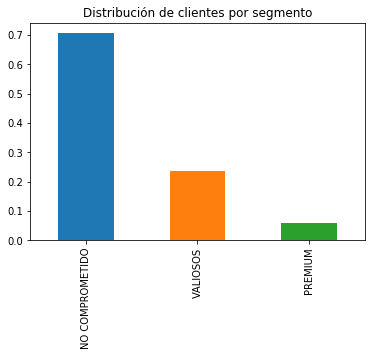

In [35]:
Graph = (df3.SEGMENT.value_counts()/len(df3)).plot(kind="bar")
Graph.set_title('Distribución de clientes por segmento')

#### El 70% de mis clientes son 'No comprometidos'. ¿Cómo voy a fidelizar más clientes? 

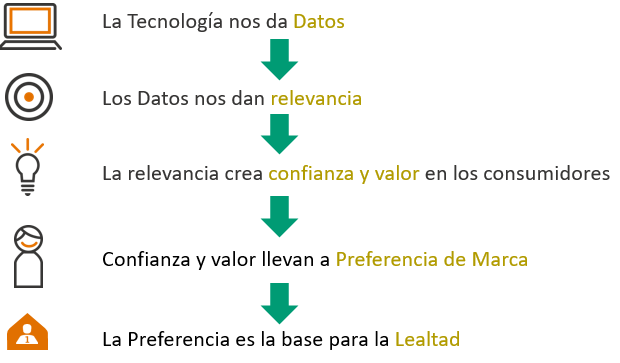

In [37]:
Image('data.png')

# Gracias!


## Daniela Arenas Vanegas

- LinkedIn: https://www.linkedin.com/in/daniela-arenasv/
- GitHub: https://github.com/darenasv/Analitica-del-Cliente


#### Referencias

- Customer Datascience: https://searchbusinessanalytics.techtarget.com/definition/customer-analytics
- sales_data_sample: https://www.kaggle.com/kyanyoga/sample-sales-data/version/1 
- dunnhumby: https://www.dunnhumby.com/
- dunnhumby on Medium : https://medium.com/dunnhumby-data-science-engineering
